<a href="https://colab.research.google.com/github/humbertohp-aidev/f1-race-analytics/blob/main/f1-race-analytics/notebooks/GP_Imola_2025_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1: Verstappen VS Piastri in Imola GP 2025

In [7]:
#Installing the FastF1 library
!pip install fastf1

## Download the Race Session Data for Imola GP

In [8]:
#Importing the dependencies
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
import os

#Create cache directory
cache_dir='cache'
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
#Enable cache
fastf1.Cache.enable_cache(cache_dir)

#Load the Race session for Imola GP 2025
session=fastf1.get_session(2025, 'Imola', 'R')
session.load()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Emilia Romagna Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data

## 1. Speed comparison in the fastest lap

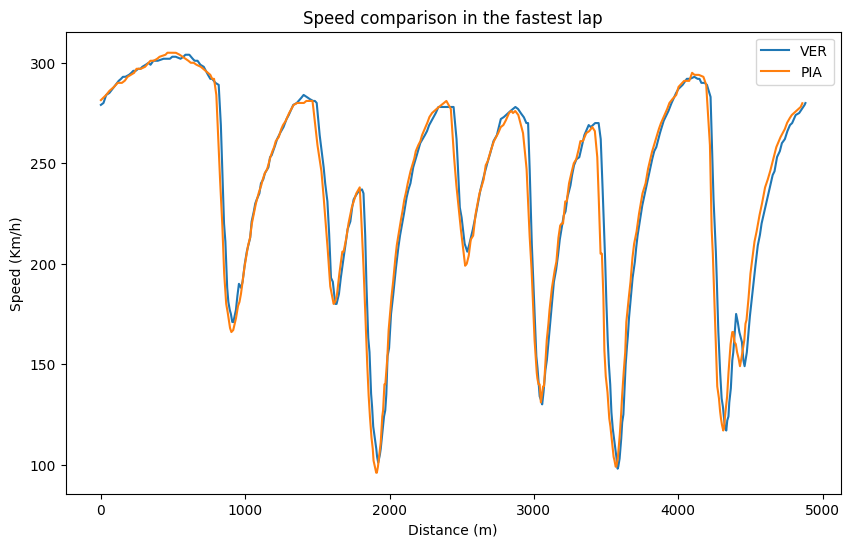

In [9]:
#Select Verstappen and Piastri laps
laps=session.laps.pick_drivers(['VER','PIA'])

#Get the telemetry data for each driver
ver_telemetry=laps[laps['Driver']=='VER'].pick_fastest().get_telemetry()
pia_telemetry=laps[laps['Driver']=='PIA'].pick_fastest().get_telemetry()

#Draw the speed for each driver in its fastest lap
plt.figure(figsize=(10,6))
plt.plot(ver_telemetry['Distance'], ver_telemetry['Speed'], label='VER')
plt.plot(pia_telemetry['Distance'], pia_telemetry['Speed'], label='PIA')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (Km/h)')
plt.title('Speed comparison in the fastest lap')
plt.legend()
plt.show()

## 2. Tyre strategies analysis

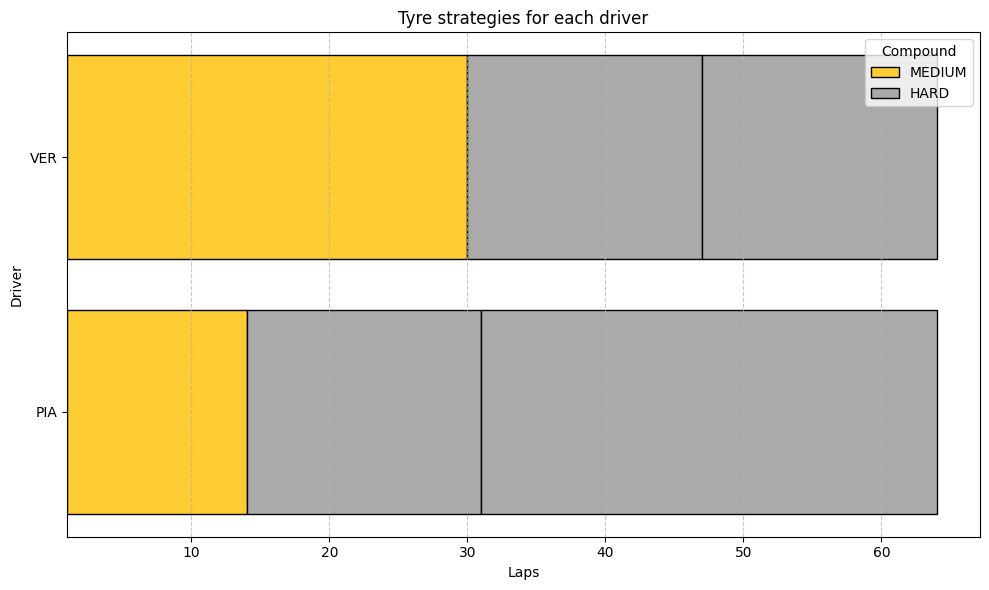

In [10]:
#Get the relevant data
tyre_strategies = laps[['Driver', 'Stint', 'Compound', 'LapNumber']]

#Group by stint
tyre_strategies=tyre_strategies.groupby(['Driver','Stint','Compound']).agg(
    StartLap=('LapNumber','min'),
    EndLap=('LapNumber','max')
).reset_index()

#Calculate the number of laps for each stint
tyre_strategies['Laps']=tyre_strategies['EndLap']-tyre_strategies['StartLap']+1

#Compound colors
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFCC33',
    'HARD': '#AAAAAA',
    'INTERMEDIATE': '#39B54A',
    'WET': '#0066CC'
}

#Draw the tyre strategies
fig, ax=plt.subplots(figsize=(10,6))
for _, row in tyre_strategies.iterrows():
    ax.barh(row['Driver'], row['Laps'], left=row['StartLap'],
            color=compound_colors.get(row['Compound'], '#CCCCCC'),
            edgecolor='black', label=row['Compound'])

#Lines to control duplicated labels in the legend
handles, labels=ax.get_legend_handles_labels()
by_label=dict(zip(labels,handles))
ax.legend(by_label.values(), by_label.keys(), title='Compound')

#Output configurations
plt.xlabel('Laps')
plt.ylabel('Driver')
plt.title('Tyre strategies for each driver')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Positions in each lap

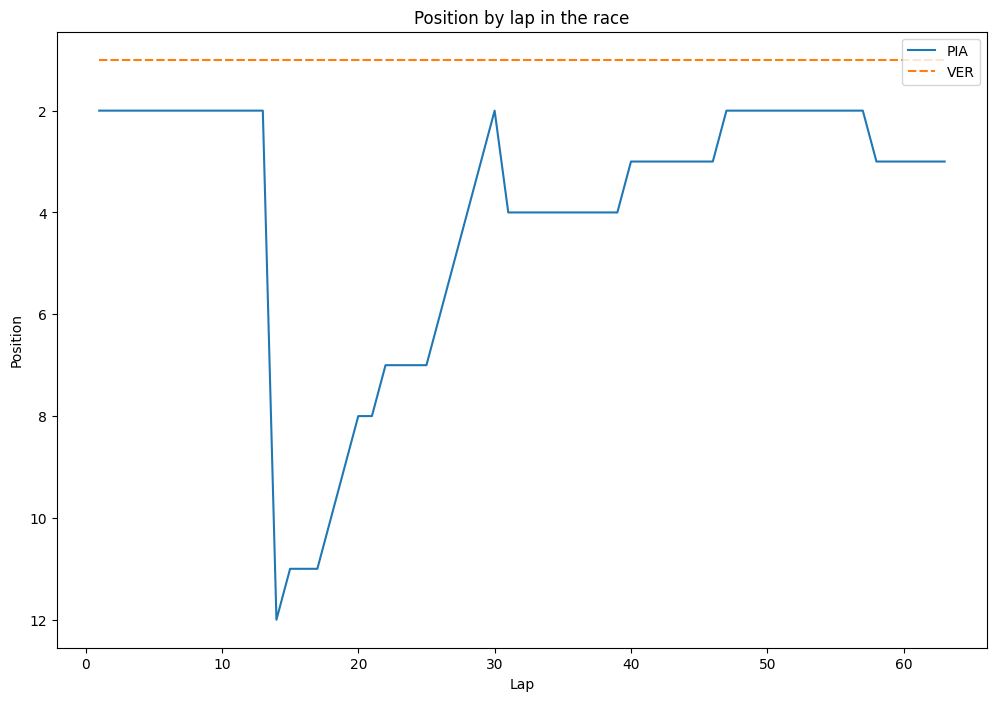

In [11]:
import seaborn as sns

#Get positions by lap
positions = laps.pivot(index='LapNumber', columns='Driver', values='Position')

#Draw the positions
plt.figure(figsize=(12, 8))
sns.lineplot(data=positions)
plt.gca().invert_yaxis()
plt.xlabel('Lap')
plt.ylabel('Position')
plt.title('Position by lap in the race')
plt.legend(loc='upper right')
plt.show()